<a href="https://colab.research.google.com/github/bubbles42/Employee-Attrition-EDA/blob/main/Employee_Attrition_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Libraies & Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
fpath = '/content/drive/MyDrive/Coding Dojo - Data Science & Machine Learning/Data Science Fundamentals/Belt Exam 1 (Wk 3)/Mod_employee_attrition - Temp employee_attrition.csv'

df = pd.read_csv(fpath)
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,DailyRate,WeeklyRate,YearlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,752,3760,195520,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,1,2,3,NaN,61,2,2,Research Scientist,2,Married,488,2440,126880,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,1,4,4,NaN,92,2,1,Laboratory Technician,3,Single,736,3680,191360,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,448,2240,116480,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,7,1,NaN,40,3,1,Laboratory Technician,2,Married,320,1600,83200,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
# Set columns option in pandas
pd.set_option('display.max_columns', 40)

df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,DailyRate,WeeklyRate,YearlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,752,3760,195520,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,1,2,3,NaN,61,2,2,Research Scientist,2,Married,488,2440,126880,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,1,4,4,NaN,92,2,1,Laboratory Technician,3,Single,736,3680,191360,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,448,2240,116480,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,7,1,NaN,40,3,1,Laboratory Technician,2,Married,320,1600,83200,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


* All data has been loaded properly. Now moving into an initial exploration of the dataset.

##Inital Exploration and Data Cleaning




###Initial Inspection

In [ ]:
df.shape

(1475, 35)

* Here we can see the dataset has 1,475 rows and 35 columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1475 non-null   int64 
 1   Attrition                 1475 non-null   object
 2   BusinessTravel            1475 non-null   object
 3   Department                1475 non-null   object
 4   DistanceFromHome          1475 non-null   int64 
 5   Education                 1475 non-null   int64 
 6   EducationField            1475 non-null   object
 7   EmployeeCount             1475 non-null   int64 
 8   EmployeeNumber            1475 non-null   int64 
 9   EnvironmentSatisfaction   1475 non-null   int64 
 10  Gender                    590 non-null    object
 11  HourlyRate                1475 non-null   object
 12  JobInvolvement            1475 non-null   int64 
 13  JobLevel                  1475 non-null   int64 
 14  JobRole                 

 - Hourly rate and years at company should be int, however they are coming in as object type
 - Gender has a lot of missing fields in the data

###Fixing the column data types, inconsistencies, and null values

####YearsAtCompany Column

In [ ]:
df['YearsAtCompany'].nunique()

38

In [ ]:
df['YearsAtCompany'].value_counts()

5     196
1     173
3     128
2     128
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     16
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
31      3
32      3
27      2
36      2
29      2
23      2
37      1
40      1
5!      1
34      1
30      1
Name: YearsAtCompany, dtype: int64

 - It looks like there was a type on 51 and someone put in 5!, we will now correct this issue

In [ ]:
df['YearsAtCompany'].replace('5!', 51, inplace=True)

In [ ]:
df['YearsAtCompany'].value_counts()

5     196
1     173
3     128
2     128
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     16
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
31      3
32      3
27      2
36      2
29      2
23      2
37      1
40      1
51      1
34      1
30      1
Name: YearsAtCompany, dtype: int64

In [ ]:
df['YearsAtCompany'] = df['YearsAtCompany'].astype(int)
df['YearsAtCompany'].dtypes

dtype('int64')

####HourlyRate Column

In [ ]:
df['HourlyRate'].dtypes

dtype('O')

In [ ]:
df['HourlyRate'].value_counts()

66     29
98     28
42     28
84     28
48     28
       ..
53     14
68     14
38     13
34     12
94_     1
Name: HourlyRate, Length: 72, dtype: int64

In [ ]:
df['HourlyRate'].replace('94_', 94, inplace=True)

#Set dtype as int
df['HourlyRate'] = df['HourlyRate'].astype(int)
df['HourlyRate'].dtypes

dtype('int64')

####Fixing null values in Gender

In [ ]:
df['Gender'].value_counts()

Female    590
Name: Gender, dtype: int64

 - It looks like all the male enteries are null since value counts is only showin females

In [ ]:
# Fill in all null values for Gender with male
df['Gender'] = df['Gender'].fillna('male')
df['Gender'].value_counts()

male      885
Female    590
Name: Gender, dtype: int64

####Check for inconsistencies

In [ ]:
obj_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include='number').columns

print(obj_cols)
print(num_cols)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')
Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'DailyRate',
       'WeeklyRate', 'YearlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [ ]:
df[obj_cols].nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [ ]:
for i in obj_cols:
  print(f'Value count for {i}')
  print(df[i].value_counts())
  print('\n')

Value count for Attrition
No     1238
Yes     237
Name: Attrition, dtype: int64


Value count for BusinessTravel
Travel_Rarely        1048
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


Value count for Department
Research & Development    964
Sales                     448
Human Resources            63
Name: Department, dtype: int64


Value count for EducationField
Life Sciences       607
Medical             467
Marketing           160
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


Value count for Gender
male      885
Female    590
Name: Gender, dtype: int64


Value count for JobRole
Sales Executive              328
Research Scientist           293
Laboratory Technician        260
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             81
Human Resources               52
Name: Job

In [ ]:
# Just want to make a quick change to the Gender and capatlize male to match with Female
df['Gender'].replace('male', 'Male', inplace=True)
df['Gender'].value_counts()

Male      885
Female    590
Name: Gender, dtype: int64

In [ ]:
for i in num_cols:
  print(f'Value count for {i}')
  print(df[i].value_counts())
  print('\n')

Value count for Age
35     78
34     78
36     69
31     69
29     68
32     62
30     60
38     59
33     58
40     57
37     50
27     48
28     48
42     46
39     42
45     41
41     40
26     39
44     34
46     33
43     32
50     30
25     26
24     26
49     24
47     24
55     22
53     19
48     19
51     19
52     18
54     18
22     16
58     14
23     14
56     14
21     13
20     11
59     10
19      9
18      8
60      5
57      4
578     1
Name: Age, dtype: int64


Value count for DistanceFromHome
2     212
1     208
10     86
9      86
7      85
3      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
15     26
18     26
26     25
25     25
20     25
19     23
28     23
14     21
12     20
17     20
13     20
22     19
21     18
27     12
Name: DistanceFromHome, dtype: int64


Value count for Education
3    574
4    399
2    284
1    170
5     48
Name: Education, dtype: int64


Value count for EmployeeCount
1    1475
Name: Emp

 - Upon completing the value count overview I can see that we may have some duplicated data within our dataset. We also may need to address the 578 year old in our dataset as well

####Checking for duplicates

In [ ]:
df.duplicated().sum()

5

In [ ]:
all_dups = df.duplicated(keep=False)
all_dups.sum()

10

 - We can se that there is 5 rows that appear twice in the dataset. Let us now take a look at those rows specifically

In [ ]:
df[all_dups].sort_values('EmployeeNumber')

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,DailyRate,WeeklyRate,YearlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
13,34,No,Travel_Rarely,Research & Development,19,2,Medical,1,18,2,Male,93,3,1,Laboratory Technician,4,Divorced,744,3720,193440,0,Y,No,11,3,3,80,1,3,2,3,2,2,1,2
14,34,No,Travel_Rarely,Research & Development,19,2,Medical,1,18,2,Male,93,3,1,Laboratory Technician,4,Divorced,744,3720,193440,0,Y,No,11,3,3,80,1,3,2,3,2,2,1,2
158,58,No,Travel_Rarely,Research & Development,9,3,Medical,1,214,2,Female,75,2,1,Research Scientist,2,Married,600,3000,156000,4,Y,Yes,20,4,2,80,1,9,3,2,1,0,0,0
159,58,No,Travel_Rarely,Research & Development,9,3,Medical,1,214,2,Female,75,2,1,Research Scientist,2,Married,600,3000,156000,4,Y,Yes,20,4,2,80,1,9,3,2,1,0,0,0
624,32,No,Travel_Rarely,Sales,13,4,Life Sciences,1,859,2,Male,73,3,2,Sales Executive,4,Divorced,584,2920,151840,2,Y,No,11,3,3,80,1,8,3,2,5,2,0,3
625,32,No,Travel_Rarely,Sales,13,4,Life Sciences,1,859,2,Male,73,3,2,Sales Executive,4,Divorced,584,2920,151840,2,Y,No,11,3,3,80,1,8,3,2,5,2,0,3
814,38,No,Travel_Rarely,Sales,2,2,Marketing,1,1125,4,Male,32,3,3,Sales Executive,2,Single,256,1280,66560,7,Y,No,16,3,3,80,0,10,2,3,1,0,0,0
815,38,No,Travel_Rarely,Sales,2,2,Marketing,1,1125,4,Male,32,3,3,Sales Executive,2,Single,256,1280,66560,7,Y,No,16,3,3,80,0,10,2,3,1,0,0,0
1144,44,No,Travel_Rarely,Research & Development,7,3,Medical,1,1608,2,Female,31,3,5,Research Director,4,Divorced,248,1240,64480,0,Y,Yes,14,3,4,80,1,23,4,2,22,7,1,10
1145,44,No,Travel_Rarely,Research & Development,7,3,Medical,1,1608,2,Female,31,3,5,Research Director,4,Divorced,248,1240,64480,0,Y,Yes,14,3,4,80,1,23,4,2,22,7,1,10


 - It appears safe to be able to just drop these columns as they are duplicates of the same employee (based on the employee number)

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

####Fixing the age typo

In [ ]:
df['Age'].value_counts()

35     78
34     77
36     69
31     69
29     68
32     61
30     60
33     58
38     58
40     57
37     50
27     48
28     48
42     46
39     42
45     41
41     40
26     39
44     33
46     33
43     32
50     30
24     26
25     26
49     24
47     24
55     22
53     19
48     19
51     19
54     18
52     18
22     16
23     14
56     14
58     13
21     13
20     11
59     10
19      9
18      8
60      5
57      4
578     1
Name: Age, dtype: int64

In [ ]:
df.loc[df['Age'] == 578]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,DailyRate,WeeklyRate,YearlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
99,578,No,Travel_Rarely,Sales,10,4,Medical,1,131,4,Male,37,3,4,Sales Executive,3,Single,296,1480,76960,0,Y,No,13,3,3,80,0,38,1,2,37,10,1,8


 - Based on the observation of the data, we will just set the 578 to 57 years old.

In [ ]:
df['Age'].replace(578, 57, inplace=True)
df['Age'].value_counts()

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    13
21    13
20    11
59    10
19     9
18     8
57     5
60     5
Name: Age, dtype: int64

In [ ]:
# Checking the cleanliness of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1474
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [ ]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
DailyRate                   0
WeeklyRate                  0
YearlyRate                  0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

##Exploratory Analysis

###Univariate Exploration

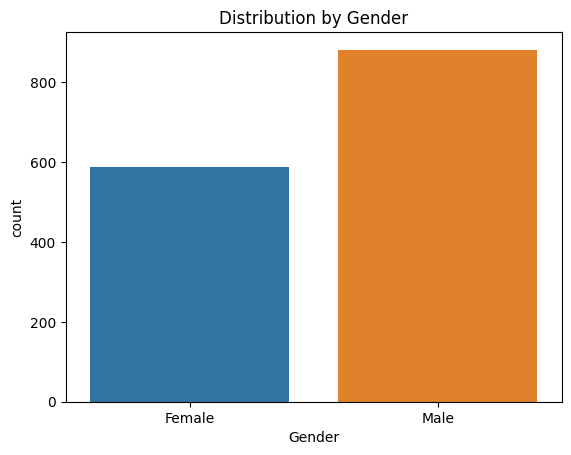

In [ ]:
ax = sns.countplot(data=df, x='Gender')
ax.set(title='Distribution by Gender');

The company has a higher count of male employees compared to female.

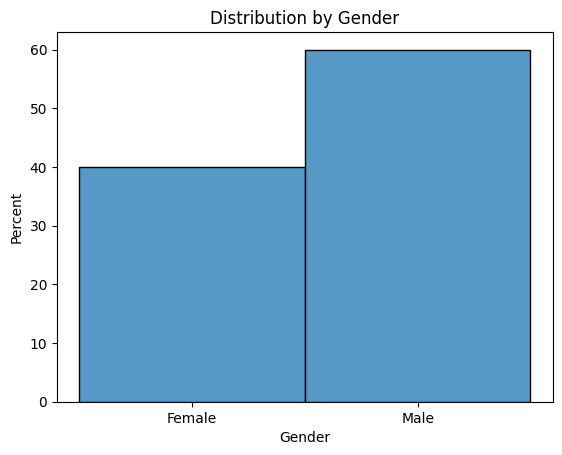

In [ ]:
ax = sns.histplot(data=df, x='Gender', stat='percent')
ax.set(title='Distribution by Gender');

There is about 20% more males than females

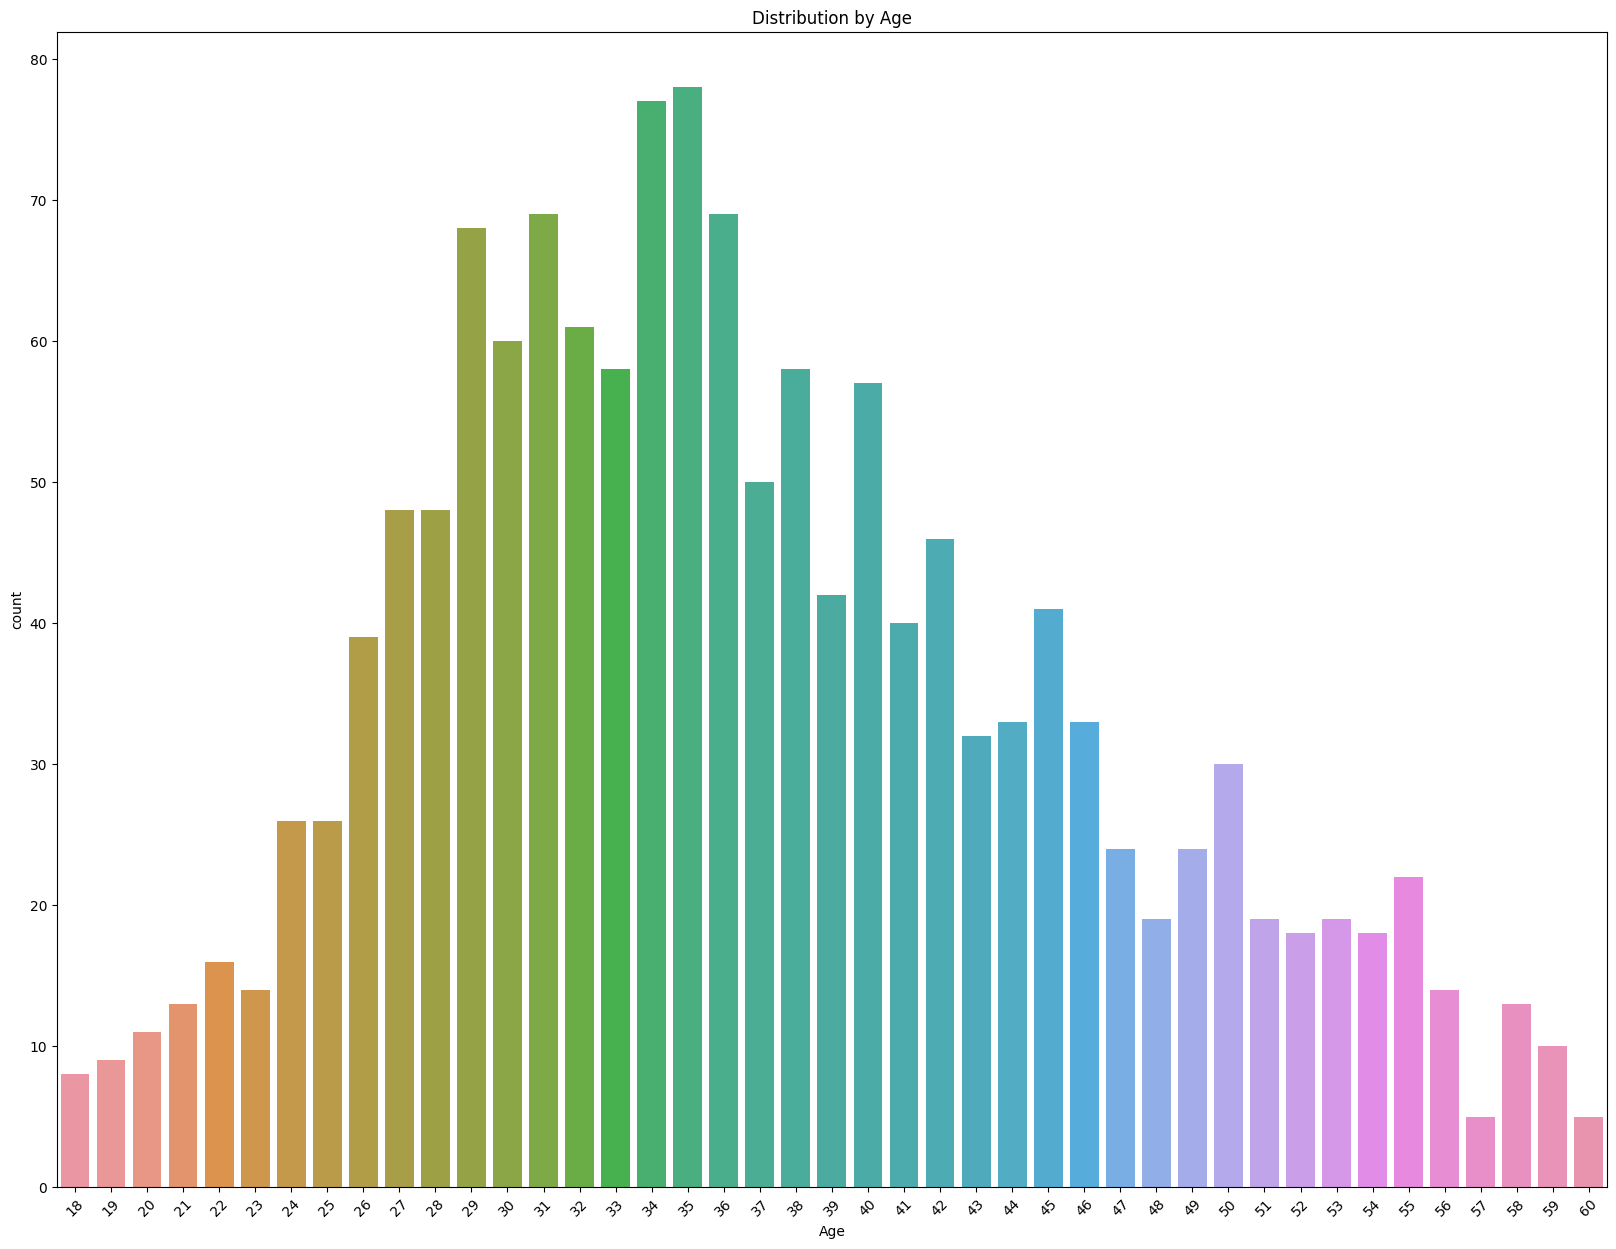

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))
sns.countplot(data=df, x='Age')
ax.set(title='Distribution by Age')
ax.tick_params(axis='x', rotation=45);

It looks like most the staff is between 30 and 40 years old

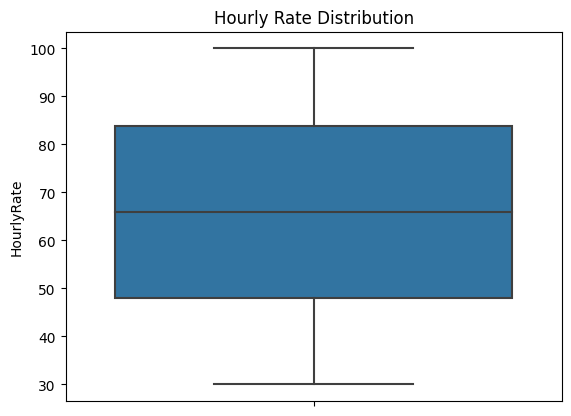

In [ ]:
ax = sns.boxplot(data=df, y='HourlyRate')
ax.set(title='Hourly Rate Distribution');

It looks like most emploees fall between about $$49 to $85 per hour

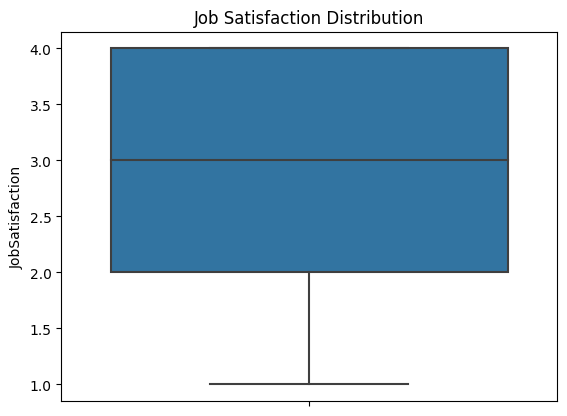

In [ ]:
ax = sns.boxplot(data=df, y='JobSatisfaction')
ax.set(title='Job Satisfaction Distribution');

Most people are medium to very high in their job satisfaction

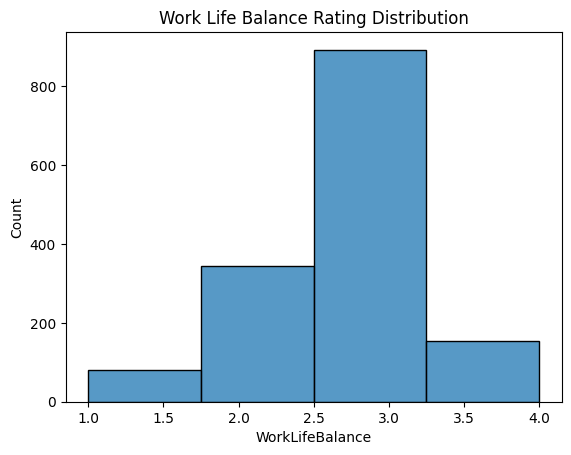

In [ ]:
ax = sns.histplot(data=df, x='WorkLifeBalance', bins=4)
ax.set(title='Work Life Balance Rating Distribution');

Is seems employees rate work life balance as either good or better (2.5-3.25)

###Multivariate Exploration

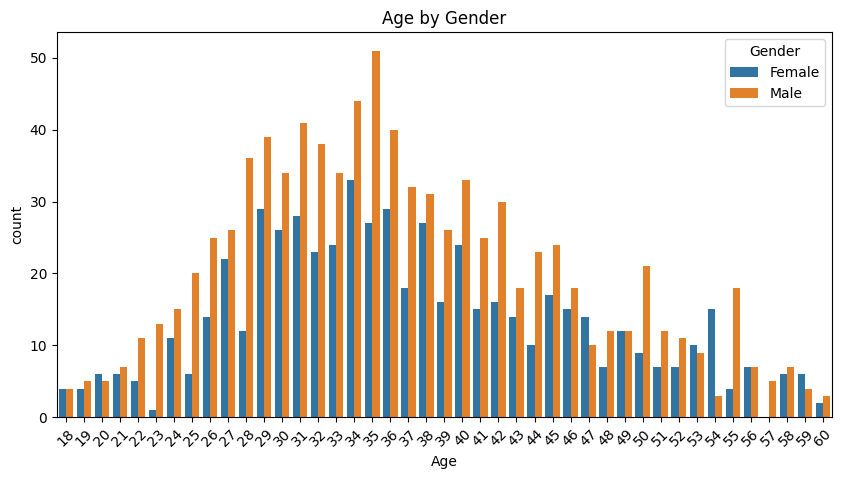

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(data=df, x='Age', hue='Gender')
ax.tick_params(axis='x', rotation=45)
ax.set(title='Age by Gender');

From the graph above we can see that there is only 2 or 3 age groups in which there are more females. Nothing really significant is found in this graph

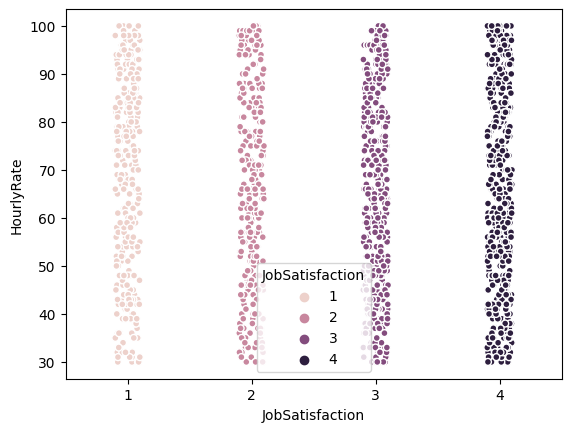

In [ ]:
fig, ax = plt.subplots()
ax = sns.stripplot(
    data=df,
    x='JobSatisfaction',
    y='HourlyRate',
    hue='JobSatisfaction',
    edgecolor='white',
    linewidth=1
)

The data seems pretty evenly distributed between hourly rate and satisfaction

In [ ]:
#Before continuing we will go ahead and drop the employee count column
df.drop(columns=['EmployeeCount', 'StandardHours'], inplace=True)
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,DailyRate,WeeklyRate,YearlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,752,3760,195520,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,488,2440,126880,1,Y,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,736,3680,191360,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,448,2240,116480,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,320,1600,83200,9,Y,No,12,3,4,1,6,3,3,2,2,2,2


In [ ]:
corr = df.corr(numeric_only=True)
corr

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,DailyRate,WeeklyRate,YearlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.001694,0.207990,-0.010037,0.010061,0.024397,0.029797,0.509559,-0.004911,0.024397,0.024397,0.024397,0.299765,0.003679,0.001936,0.053524,0.037585,0.680239,-0.019520,-0.021413,0.309035,0.212818,0.216577,0.202042
DistanceFromHome,-0.001694,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,0.031131,0.031131,0.031131,-0.029251,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.004888,0.018845,0.010029,0.014406
Education,0.207990,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.016775,0.016775,0.016775,0.126317,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.063457,0.060236,0.054254,0.069065
EmployeeNumber,-0.010037,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,0.035179,0.035179,0.035179,-0.001251,-0.012944,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.019218,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010061,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.049857,-0.049857,-0.049857,0.012594,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.007308,0.018007,0.016194,-0.004999
HourlyRate,0.024397,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,1.000000,1.000000,1.000000,0.022157,-0.009062,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.017738,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029797,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,0.042861,0.042861,0.042861,0.015012,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.012024,0.008717,-0.024184,0.025976
JobLevel,0.509559,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,-0.027853,-0.027853,-0.027853,0.142501,-0.034730,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.520791,0.389447,0.353885,0.375281
JobSatisfaction,-0.004911,-0.003669,-0.011296,-0.046247,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.071335,-0.071335,-0.071335,-0.055699,0.020002,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.002501,-0.002305,-0.018214,-0.027656
DailyRate,0.024397,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,1.000000,1.000000,1.000000,0.022157,-0.009062,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.017738,-0.024106,-0.026716,-0.020123


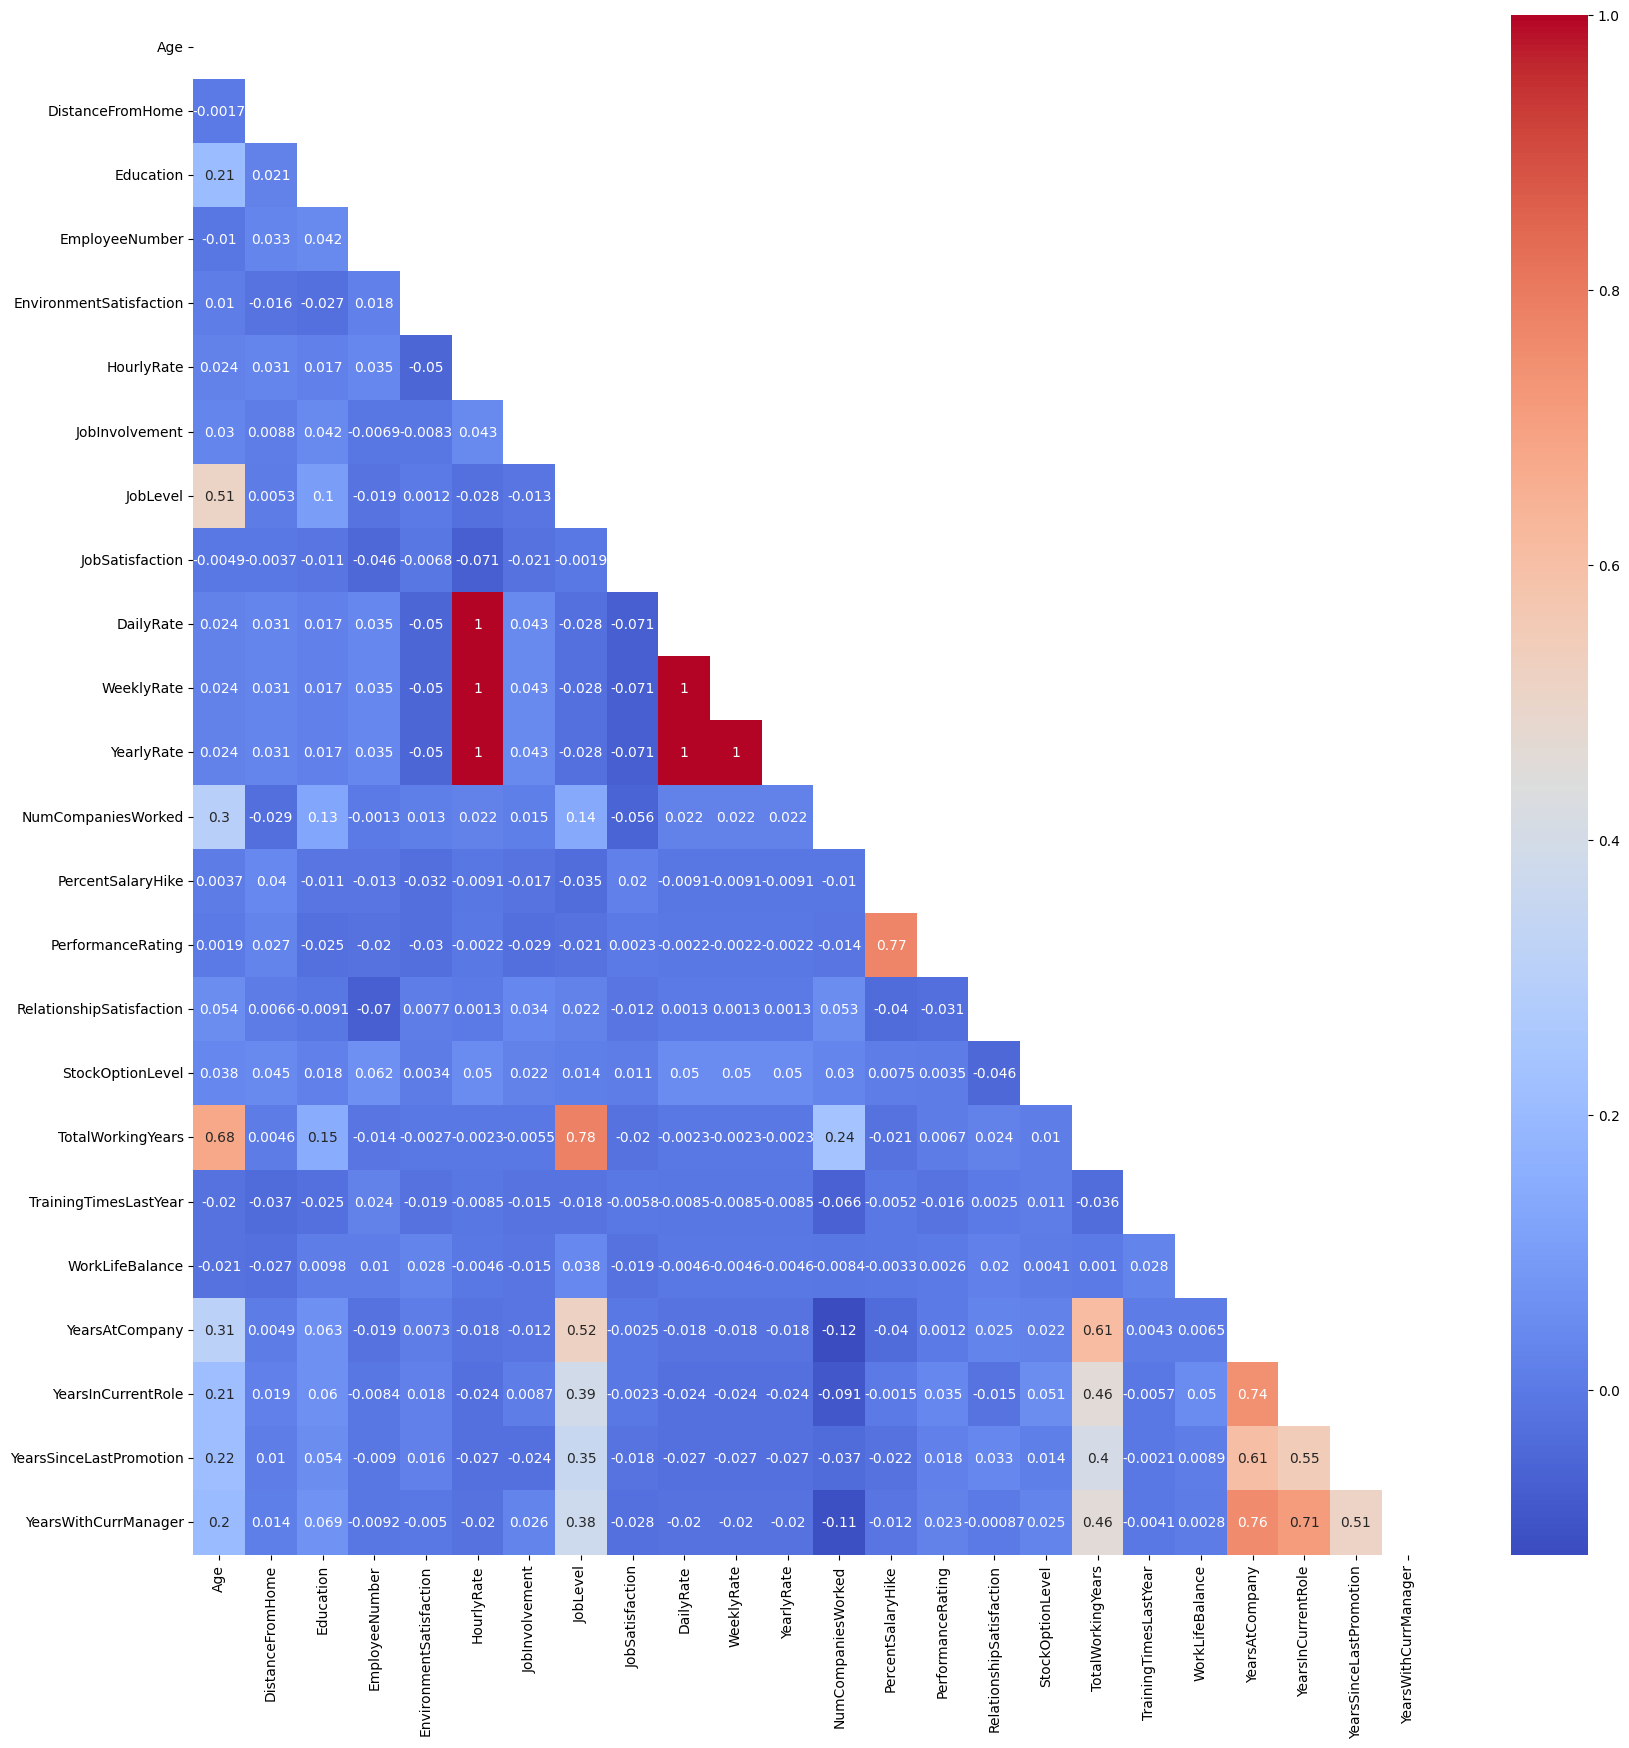

In [ ]:
mask = np.triu(np.ones_like(corr))
fig, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(
    corr,
    cmap='coolwarm',
    annot=True,
    mask=mask
)

The above give a correlation map so we can see which features are more positively or negatively correlated.
 - As to be expected hourly, Daily, Weekly, and Yearly columns are are a perfect 1 correlation
 - The next highest correlation is JobLevel and WorkinYears (.78)
 - PerformanceRating and PercentSalaryHike are strongly correlated at
  0.77
 - There is a strong correlation is TotalWorkingYears and Age at .68
 - We can also observe that there is a strong correlation between the columns that are compared in the lower right corner of the graph
 - There are several other moderate to low correlations as well:
  - Age:[YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Education, NumCompaniesWorked] all have a positive correclation

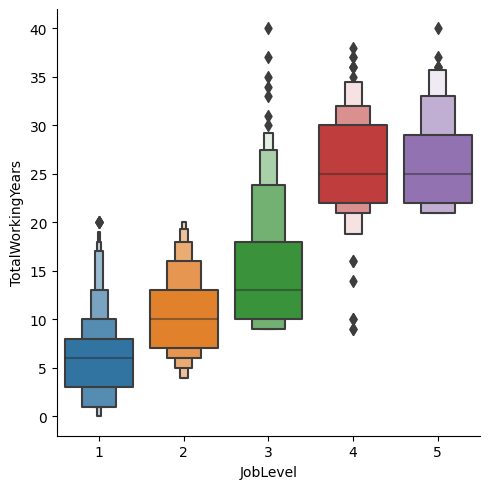

In [ ]:
ax = sns.catplot(
    data=df,
    x='JobLevel',
    y='TotalWorkingYears',
    kind='boxen'
)

This graph clearly illustrates that as the JobLevel increases so does the working years

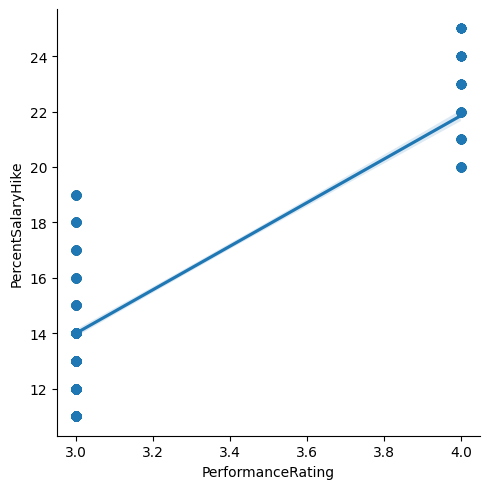

In [ ]:
ax = sns.lmplot(data=df, x='PerformanceRating', y='PercentSalaryHike')

This regression plot shows us that there is in face a strong positive correlation between performance and salary hike

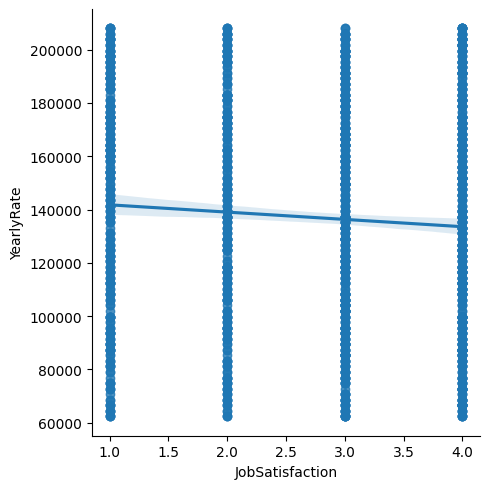

In [ ]:
ax = sns.lmplot(data=df, x='JobSatisfaction', y='YearlyRate')

It seems as though the higher paid employees may have a lower satifaction rating when compared to lower compenstated employees.